In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Simulating an Arrow-robot

In [11]:
# Perfect sensor
def sense(x):
    return x

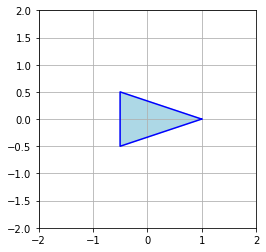

In [48]:
def draw_triangular_robot(x, y, theta, ax, scale=.1):
    # Define the vertices of a triangle
    vertices = np.array([[1, 0], [-0.5, 0.5], [-0.5, -0.5]])
    vertices*=scale

    # Rotate the triangle based on the provided theta
    rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                                [np.sin(theta), np.cos(theta)]])
    vertices = np.dot(vertices, rotation_matrix.T)

    # Translate the triangle to the specified (x, y) position
    vertices += np.array([x, y])

    # Close the triangle by repeating the first vertex
    vertices = np.vstack([vertices, vertices[0]])

    # Plot the triangular robot
    ax.plot(vertices[:, 0], vertices[:, 1], 'b-')
    ax.fill(vertices[:, 0], vertices[:, 1], color='lightblue')  # Fill the triangle with color


# Example usage:
fig, ax = plt.subplots()
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_aspect('equal')
ax.grid()
draw_triangular_robot(x=0, y=0, theta=0, ax=ax, scale=1)

### Euler integration

In [43]:
def simulate(Δt, x, u):
    v, omg = u
    dx = array([v * cos(x[2]), v * sin(x[2]), omg])
    x += Δt * dx
    
    return x

### Control policy

In [44]:
def control(t, y):
    ### WRITE YOUR CONTROL POLICY HERE:
    v, omg = 1, 1
    return array([v, omg])

### Running the simulator

In [45]:
tf = 3.
Δt = 0.1    # Time step
time = linspace(0.,tf, int(tf / Δt) + 1)  # Time interval


# Initial conditions
x = array([2., 1., 0])
x_log = [copy(x)]

for t in time:
    y = sense(x)
    u = control(t, y)    
    x = simulate(Δt, x, u)
    x_log.append(copy(x))
    
x_log = array(x_log)

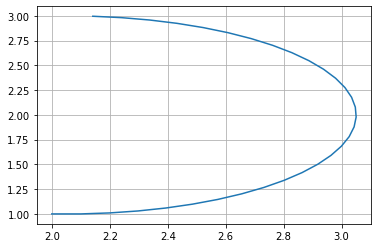

In [46]:
grid()
plot(x_log[:,0], x_log[:,1])

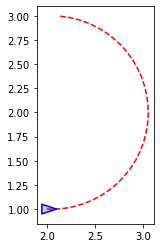

In [47]:
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display    
from IPython.display import HTML
    


fig, ax = plt.subplots()
ax.set_aspect('equal')
def animate(t):
    ax.clear()
    
    # Path
    plot(x_log[:,0], x_log[:,1], 'r--')
    
    # Initial conditions
#     plot(x_log[t,0], x_log[t,1], 'bo')
    
    draw_triangular_robot(x=x_log[t,0], y=x_log[t,1], theta=x_log[t,2], ax=ax)

anim = animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

HTML(anim.to_jshtml())